In [1]:
import pandas as pd

df = pd.read_csv('student_records.csv')

print(df.head(2))
print("------INFO--------")
print(df.info())
print("------Describe--------")
print(df.describe())
print("--------------")

   StudentID       Name Gender    Class Region    ExamDate  MathScore  \
0          1  Student_1      M  Class_B  South  03-03-2025         53   
1          2  Student_2      F  Class_C  South  27-03-2025         45   

   ScienceScore  EnglishScore  StudyHours  AttendancePercent  
0            91            59           5               95.4  
1            62            47           3               74.1  
------INFO--------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          100 non-null    int64  
 1   Name               100 non-null    object 
 2   Gender             100 non-null    object 
 3   Class              100 non-null    object 
 4   Region             100 non-null    object 
 5   ExamDate           100 non-null    object 
 6   MathScore          100 non-null    int64  
 7   ScienceScore       100 non-null

In [7]:
avg_MathScore_by_region = df.groupby('Region')['MathScore'].mean()
print("Average Math Score by Region:", avg_MathScore_by_region)


Average Math Score by Region: Region
East     74.600000
North    67.315789
South    69.285714
West     77.121212
Name: MathScore, dtype: float64


# Problem 1

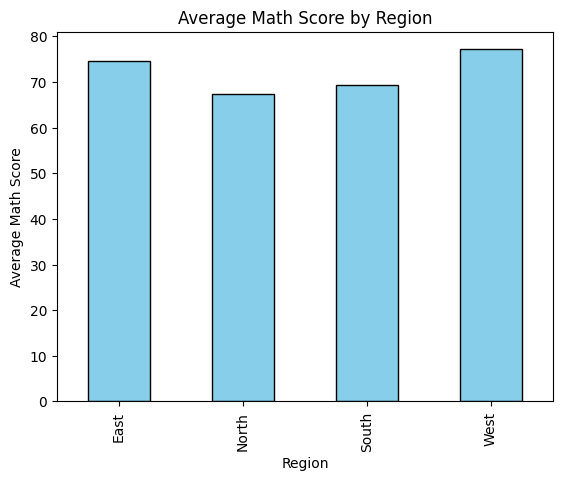

In [12]:
from matplotlib import pyplot as plt

plt.figure()

avg_MathScore_by_region.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average Math Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Math Score')
plt.show()

# Problem 2

ExamDate
2025-01-31    71.562500
2025-02-28    73.437500
2025-03-31    58.095238
2025-04-30    67.210526
2025-05-31    67.647059
2025-06-30    74.363636
Freq: ME, Name: ScienceScore, dtype: float64


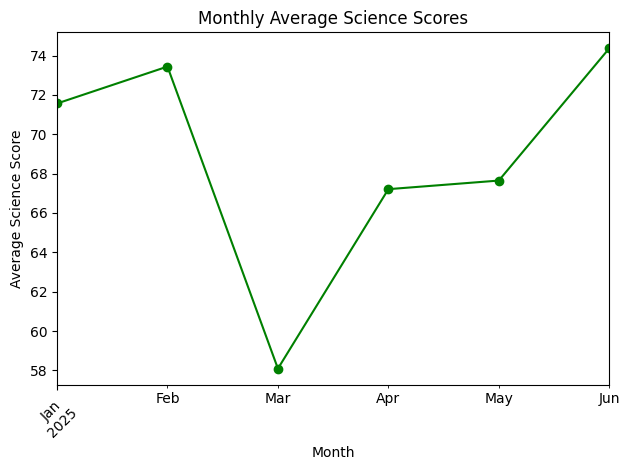

In [15]:
df['ExamDate'] = pd.to_datetime(df['ExamDate'], dayfirst=True)

monthly = df.set_index('ExamDate').resample('ME')['ScienceScore'].mean()
print(monthly)

monthly.plot(kind='line', marker='o', color='green')

plt.title('Monthly Average Science Scores')
plt.xlabel('Month')
plt.ylabel('Average Science Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Problem 3

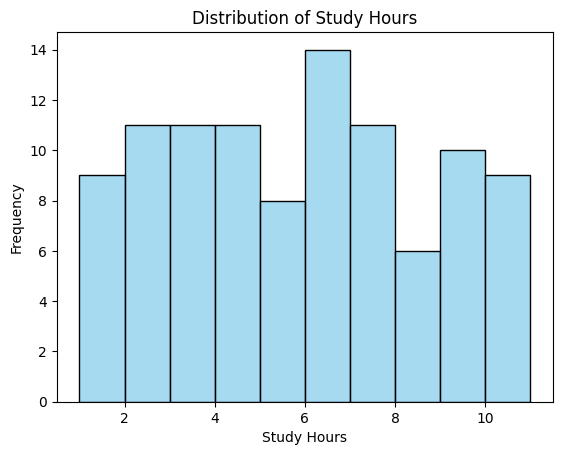

In [18]:
import seaborn as sns

sns.histplot(df['StudyHours'], bins=range(df['StudyHours'].min(), df['StudyHours'].max() + 2), kde=False, color='skyblue', edgecolor='black')
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')

plt.show()

# Problem 4

Gender
F    56
M    44
Name: count, dtype: int64


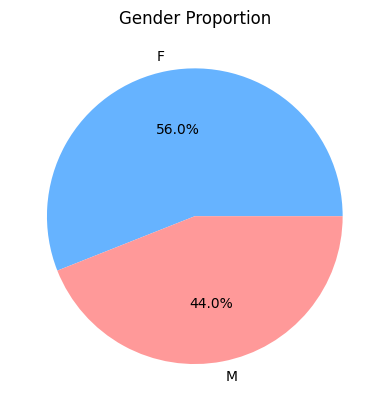

In [23]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)

plt.figure()
gender_counts.plot.pie(autopct='%1.1f%%',  colors=['#66b3ff', '#ff9999'])
plt.title('Gender Proportion')
plt.ylabel('')
plt.show()

# Problem 5

Class
Class_A    39
Class_C    36
Class_B    25
Name: count, dtype: int64


C:\Users\91755\AppData\Local\Temp\ipykernel_20152\1339204458.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, order=class_counts.index, palette='pastel', edgecolor='black')


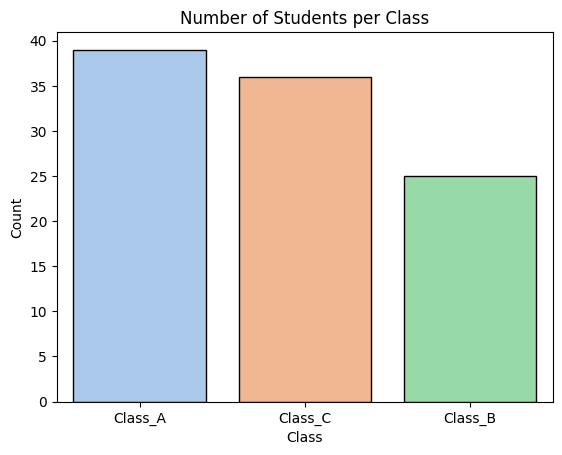

In [25]:
class_counts = df['Class'].value_counts()
print(class_counts)

sns.countplot(x='Class', data=df, order=class_counts.index, palette='pastel', edgecolor='black')
plt.title('Number of Students per Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Problem 6

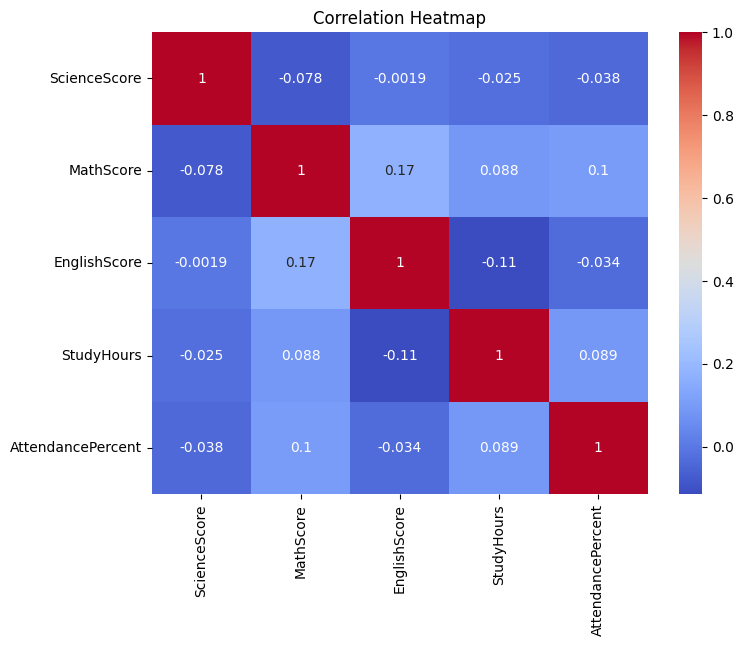

In [ ]:
corr = df[['ScienceScore', 'MathScore', 'EnglishScore', 'StudyHours', 'AttendancePercent']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Problem 7

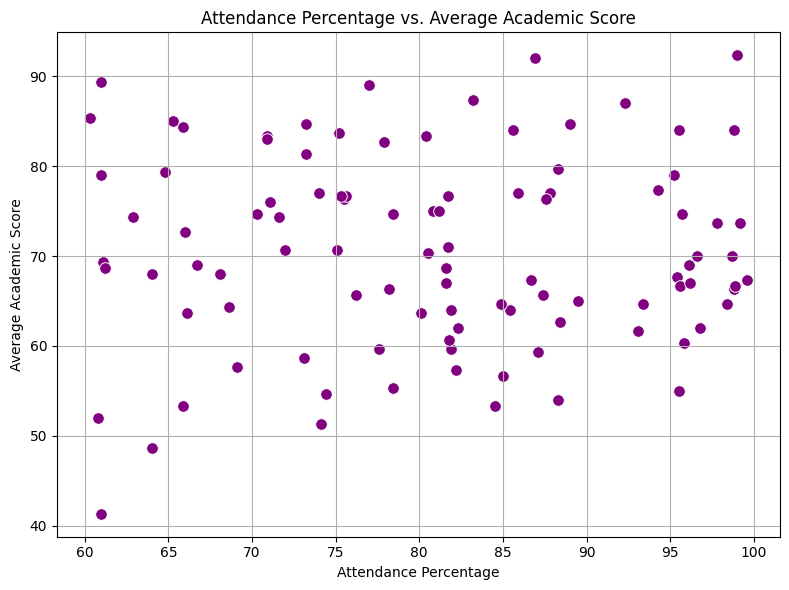

In [31]:
df['AverageScore'] = df[['MathScore', 'ScienceScore', 'EnglishScore']].mean(axis=1)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='AttendancePercent', y='AverageScore', data=df, color='purple', edgecolor='w', s=70)
plt.title('Attendance Percentage vs. Average Academic Score')
plt.xlabel('Attendance Percentage')
plt.ylabel('Average Academic Score')
plt.grid(True)
plt.tight_layout()
plt.show()